In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


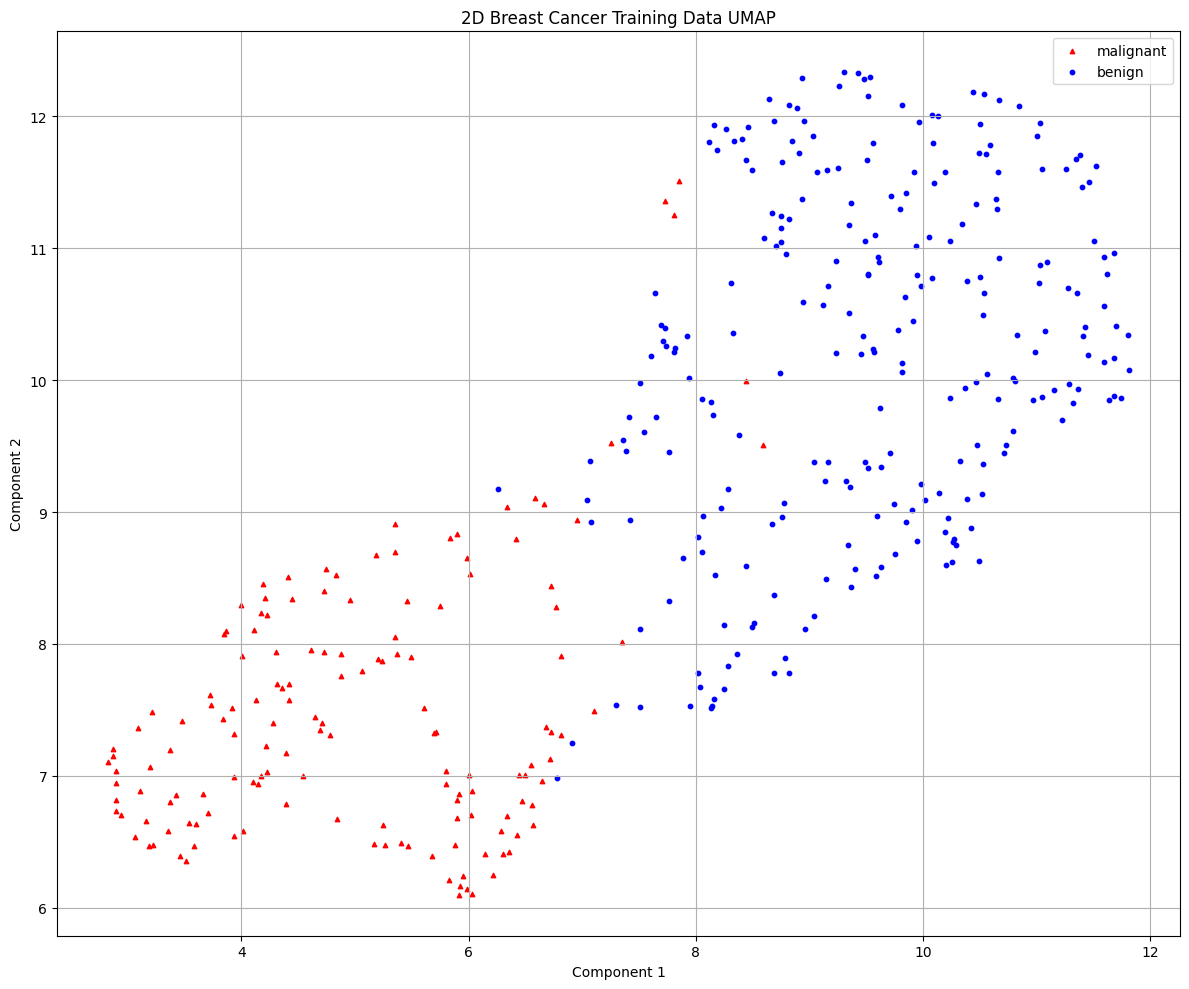

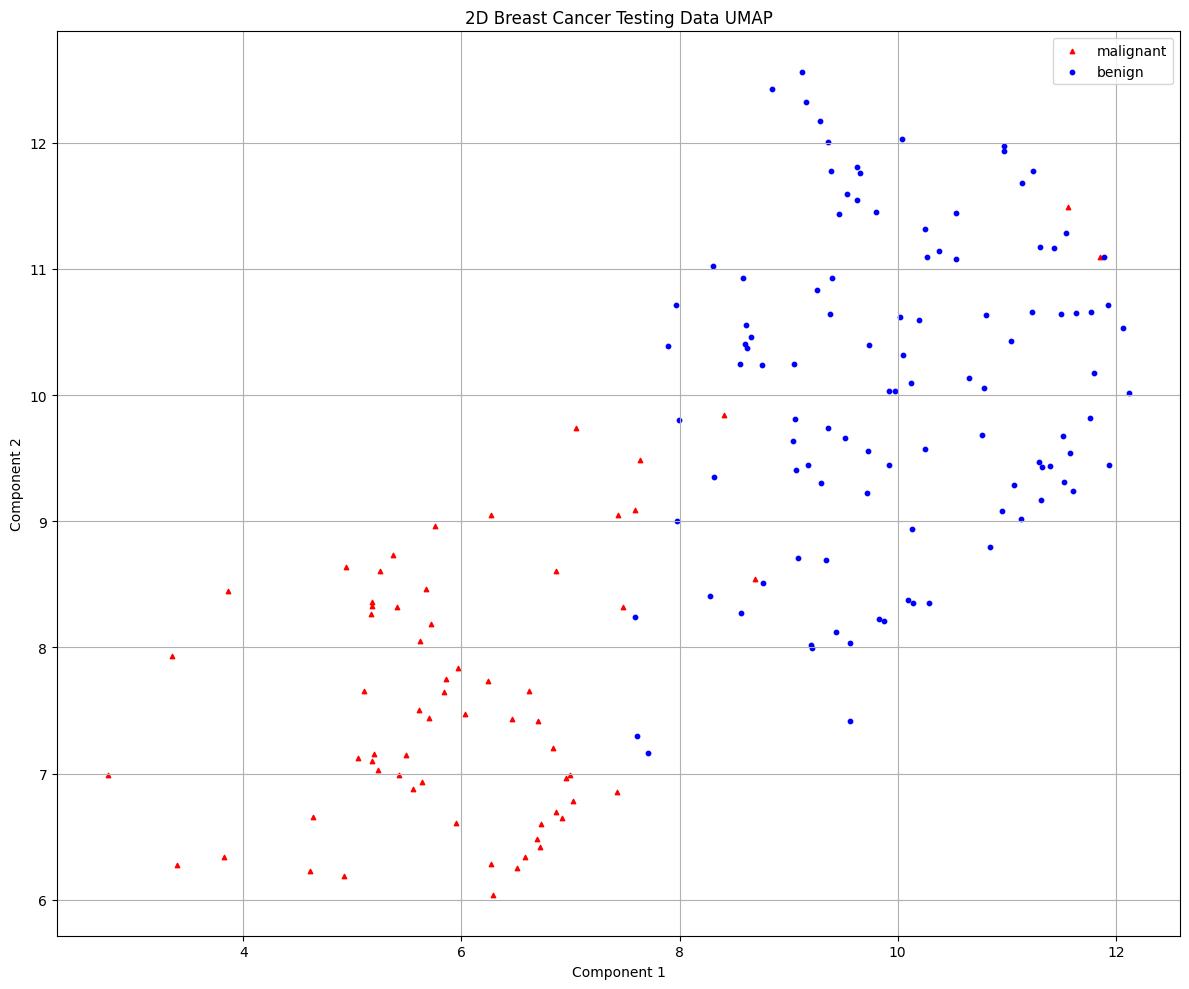

[I 2025-04-27 18:41:56,716] A new study created in memory with name: no-name-344d8a0c-9f69-4864-a8b6-ee0a7a0fc39d
[I 2025-04-27 18:42:08,707] Trial 0 finished with value: 0.9648101265822785 and parameters: {'n_estimators': 3526, 'max_depth': 15, 'learning_rate': 0.011038356690502436, 'subsample': 0.7739237157667691, 'colsample_bytree': 0.6858337059402841, 'gamma': 1.7460779567423823, 'reg_alpha': 3.22197928478495e-08, 'reg_lambda': 0.01932992328748518}. Best is trial 0 with value: 0.9648101265822785.
[I 2025-04-27 18:42:28,409] Trial 1 finished with value: 0.9698417721518988 and parameters: {'n_estimators': 5219, 'max_depth': 8, 'learning_rate': 0.013928861971377307, 'subsample': 0.8440045696882348, 'colsample_bytree': 0.7676580529722026, 'gamma': 1.1223374586649582, 'reg_alpha': 0.11566474254317281, 'reg_lambda': 0.3014556091087288}. Best is trial 1 with value: 0.9698417721518988.
[I 2025-04-27 18:42:57,544] Trial 2 finished with value: 0.9648734177215189 and parameters: {'n_estimator

Best trial:
Accuracy: 0.9749367088607596
Best hyperparameters:  {'n_estimators': 5759, 'max_depth': 12, 'learning_rate': 0.019642358802348794, 'subsample': 0.8001307353229631, 'colsample_bytree': 0.9844645507041002, 'gamma': 3.4450487445380196, 'reg_alpha': 0.13804282164263942, 'reg_lambda': 0.09550586179061353}


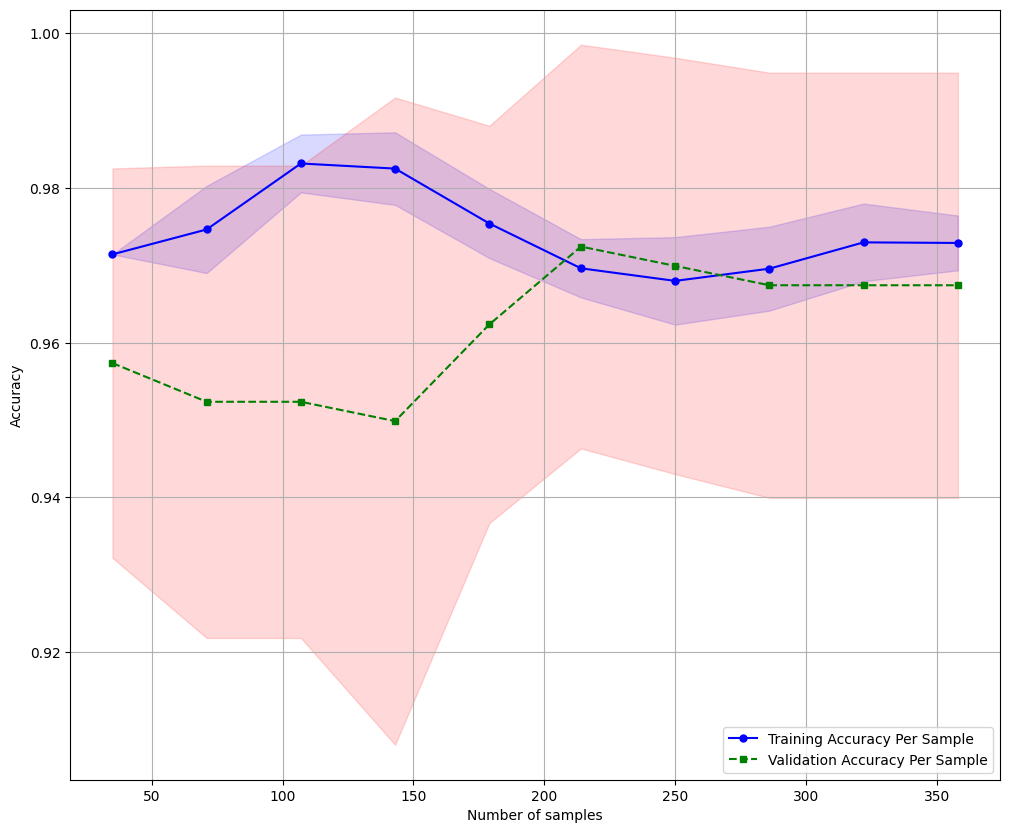

Confusion Matrix
[[ 54  10]
 [  0 107]]
Accuracy: 0.9415, Precision: 0.9145, Recall: 1.0000, F1: 0.9554, AUC: 0.9793


In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(X_train_scaled, X_test_scaled, y_train, y_test, 'umap', {})

helper.train_and_evaluate_model('xgb', X_train_feature_extracted, X_test_feature_extracted, y_train, y_test)